# Interpretable Feature extraction

This is the first notebook to run to extract the features from the `.h5` files. It is assumed that the folder straucture with the following format is available:

The files are saved as `.h5` files with at least three keys: `image` (numpy array), `mask` (numpy array), `label` (str).

Apart from each file, we assume that the data comes from different experiments, donors and conditions. For example, in case we have N experiments, M donors and K conditions, the data path folder should look like this.


```
data_path/Experiment_1/Donor_1/condition_1/*.h5
data_path/Experiment_1/Donor_1/condition_2/*.h5
.
.
.
data_path/Experiment_1/Donor_2/condition_1/*.h5
data_path/Experiment_1/Donor_2/condition_2/*.h5
.
.
.
data_path/Experiment_N/Donor_M/condition_K/*.h5
```

For the the feature extraction and analysis we use the `scifAI` package. For installing it you can simply install it from github 

```
git clone https://github.com/marrlab/scifAI.git
pip install <path to the package>
```

here we import a series of needed modules.

In [1]:
import scifAI
import matplotlib.pyplot as plt
from scifAI.ml import features
from scifAI.ml import AutoFeatureSelection
from scifAI.ml import FeatureExtractor 
import numpy as np
import pandas as pd
import glob
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm 
from sklearn.model_selection import train_test_split
import h5py
from sklearn.pipeline import  FeatureUnion, Pipeline
from sklearn.feature_extraction import DictVectorizer
from scifAI.utils import list_of_dict_to_dict
from sklearn.preprocessing import MinMaxScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import seaborn as sns


now lets calculate the metadata:

In [2]:
data_path = "/pstore/data/DS4/synapse_formation_full_data/"

metadata = scifAI.metadata_generator(data_path)


Metadata prepration starts...
Experiment_1 Donor_1 +SEA


100%|██████████| 60000/60000 [01:13<00:00, 820.57it/s] 


Experiment_1 Donor_1 -SEA


100%|██████████| 60000/60000 [00:38<00:00, 1539.04it/s]


Experiment_1 Donor_1 Isotype


100%|██████████| 60000/60000 [00:55<00:00, 1088.27it/s]


Experiment_1 Donor_1 Teplizumab


100%|██████████| 60000/60000 [00:55<00:00, 1084.90it/s]


Experiment_1 Donor_2 +SEA


100%|██████████| 60000/60000 [00:54<00:00, 1104.17it/s]


Experiment_1 Donor_2 -SEA


100%|██████████| 60000/60000 [00:53<00:00, 1112.79it/s]


Experiment_1 Donor_2 Isotype


100%|██████████| 60000/60000 [00:55<00:00, 1083.91it/s]


Experiment_1 Donor_2 Teplizumab


100%|██████████| 60000/60000 [00:54<00:00, 1101.67it/s]


Experiment_2 Donor_3 +SEA


100%|██████████| 60000/60000 [00:55<00:00, 1077.27it/s]


Experiment_2 Donor_3 -SEA


100%|██████████| 60001/60001 [00:55<00:00, 1084.18it/s]


Experiment_2 Donor_3 Isotype


100%|██████████| 60000/60000 [00:54<00:00, 1095.39it/s]


Experiment_2 Donor_3 Teplizumab


100%|██████████| 60000/60000 [00:56<00:00, 1068.06it/s]


Experiment_2 Donor_4 +SEA


100%|██████████| 60000/60000 [00:55<00:00, 1084.65it/s]


Experiment_2 Donor_4 -SEA


100%|██████████| 60000/60000 [00:55<00:00, 1089.97it/s]


Experiment_2 Donor_4 Isotype


100%|██████████| 60000/60000 [00:55<00:00, 1074.76it/s]


Experiment_2 Donor_4 Teplizumab


100%|██████████| 60000/60000 [00:55<00:00, 1079.73it/s]


Experiment_3 Donor_1 +SEA


100%|██████████| 55000/55000 [00:50<00:00, 1084.79it/s]


Experiment_3 Donor_1 -SEA


100%|██████████| 55000/55000 [00:51<00:00, 1076.43it/s]


Experiment_3 Donor_1 CD19-TCB


100%|██████████| 55000/55000 [00:50<00:00, 1082.74it/s]


Experiment_3 Donor_1 CD20-TCB


100%|██████████| 28701/28701 [00:27<00:00, 1053.53it/s]


Experiment_3 Donor_1 DIG-TCB


100%|██████████| 55000/55000 [00:52<00:00, 1046.83it/s]


Experiment_3 Donor_1 Isotype


100%|██████████| 55000/55000 [00:55<00:00, 996.94it/s] 


Experiment_3 Donor_1 Teplizumab


100%|██████████| 53375/53375 [00:48<00:00, 1089.31it/s]


Experiment_3 Donor_5 +SEA


100%|██████████| 55000/55000 [00:50<00:00, 1093.71it/s]


Experiment_3 Donor_5 -SEA


100%|██████████| 55000/55000 [00:50<00:00, 1089.78it/s]


Experiment_3 Donor_5 CD19-TCB


100%|██████████| 49020/49020 [00:44<00:00, 1094.02it/s]


Experiment_3 Donor_5 CD20-TCB


100%|██████████| 21208/21208 [00:19<00:00, 1108.21it/s]


Experiment_3 Donor_5 DIG-TCB


100%|██████████| 55000/55000 [00:48<00:00, 1130.26it/s]


Experiment_3 Donor_5 Isotype


100%|██████████| 55000/55000 [00:49<00:00, 1111.95it/s]


Experiment_3 Donor_5 Teplizumab


100%|██████████| 55000/55000 [00:49<00:00, 1118.15it/s]


Experiment_3 Donor_6 +SEA


100%|██████████| 55000/55000 [00:49<00:00, 1106.50it/s]


Experiment_3 Donor_6 -SEA


100%|██████████| 55000/55000 [00:50<00:00, 1096.48it/s]


Experiment_3 Donor_6 Isotype


100%|██████████| 55000/55000 [00:50<00:00, 1089.99it/s]


Experiment_3 Donor_6 Teplizumab


100%|██████████| 55000/55000 [00:50<00:00, 1094.45it/s]


Experiment_4 Donor_2 +SEA


0it [00:00, ?it/s]

Experiment_4 Donor_2 -SEA



100%|██████████| 55000/55000 [00:49<00:00, 1116.72it/s]


Experiment_4 Donor_2 CD19-TCB


100%|██████████| 55000/55000 [00:50<00:00, 1095.00it/s]


Experiment_4 Donor_2 CD20-TCB


100%|██████████| 51821/51821 [00:46<00:00, 1120.93it/s]


Experiment_4 Donor_2 DIG-TCB


100%|██████████| 55000/55000 [00:49<00:00, 1108.52it/s]


Experiment_4 Donor_7 +SEA


100%|██████████| 55000/55000 [00:51<00:00, 1065.00it/s]


Experiment_4 Donor_7 -SEA


100%|██████████| 55000/55000 [00:51<00:00, 1076.26it/s]


Experiment_4 Donor_7 CD19-TCB


100%|██████████| 55000/55000 [00:51<00:00, 1067.77it/s]


Experiment_4 Donor_7 CD20-TCB


100%|██████████| 55000/55000 [00:52<00:00, 1055.19it/s]


Experiment_4 Donor_7 DIG-TCB


100%|██████████| 55000/55000 [00:50<00:00, 1078.57it/s]


Experiment_4 Donor_8 +SEA


100%|██████████| 42781/42781 [00:36<00:00, 1167.11it/s]


Experiment_4 Donor_8 -SEA


100%|██████████| 55000/55000 [00:50<00:00, 1083.09it/s]


Experiment_4 Donor_8 CD19-TCB


100%|██████████| 55000/55000 [00:50<00:00, 1095.06it/s]


Experiment_4 Donor_8 CD20-TCB


100%|██████████| 48357/48357 [00:43<00:00, 1101.64it/s]


Experiment_4 Donor_8 DIG-TCB


100%|██████████| 55000/55000 [00:49<00:00, 1102.16it/s]


Experiment_4 Donor_9 +SEA


100%|██████████| 55000/55000 [00:50<00:00, 1092.16it/s]


Experiment_4 Donor_9 -SEA


100%|██████████| 55000/55000 [00:49<00:00, 1103.16it/s]


Experiment_4 Donor_9 CD19-TCB


100%|██████████| 55000/55000 [00:50<00:00, 1091.25it/s]


Experiment_4 Donor_9 CD20-TCB


100%|██████████| 49311/49311 [00:44<00:00, 1111.98it/s]


Experiment_4 Donor_9 DIG-TCB


100%|██████████| 55000/55000 [00:49<00:00, 1104.85it/s]


...metadata prepration ended.


`scifAI` can run on multiple nodes, therefore it can be parallelized. Considering that we have more than 2.8 millions images, it takes some time to calculate the metadata and features. Now, lets save the metadata as a zipped csv.

In [3]:
metadata.to_csv("/pstore/data/DS4/synapse_data_features/metadata.csv.gz", compression='gzip', index = False )

In [4]:
metadata.head()

,file,experiment,donor,condition,object_number,set,label
0,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_1,Donor_1,+SEA,47389,unlabeled,-1
1,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_1,Donor_1,+SEA,5156,unlabeled,-1
2,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_1,Donor_1,+SEA,32020,unlabeled,-1
3,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_1,Donor_1,+SEA,16752,unlabeled,-1
4,/pstore/data/DS4/synapse_formation_full_data/E...,Experiment_1,Donor_1,+SEA,55974,unlabeled,-1


so now, we have a dataframe which includes all the files, experiments, donors, conditions and their object numbers. In case an image is not labeled, it is assigned -1 as its labeled which can be useful for semi-supervised learning. Now lets how many files we have:

In [5]:
metadata.shape

(2899575, 7)

also these are the possible combination of experiments, donors and conditions

In [6]:
all_combinations = metadata.groupby(["experiment", "donor", "condition"]).size().reset_index()
all_combinations

,experiment,donor,condition,0
0,Experiment_1,Donor_1,+SEA,60000
1,Experiment_1,Donor_1,-SEA,60000
2,Experiment_1,Donor_1,Isotype,60000
3,Experiment_1,Donor_1,Teplizumab,60000
4,Experiment_1,Donor_2,+SEA,60000
5,Experiment_1,Donor_2,-SEA,60000
6,Experiment_1,Donor_2,Isotype,60000
7,Experiment_1,Donor_2,Teplizumab,60000
8,Experiment_2,Donor_3,+SEA,60000
9,Experiment_2,Donor_3,-SEA,60001


In [7]:
print(int(all_combinations[0].mean()))

54708


In [8]:
all_combinations.groupby("condition").sum()

,0
condition,
+SEA,557781
-SEA,625001
CD19-TCB,324020
CD20-TCB,254398
DIG-TCB,330000
Isotype,405000
Teplizumab,403375


so we have these many samples per condition! To reduce the number of samples and still have a meaningful dataset, we sample 20,000 from each combination. In addition, we make sure that the previously annotated images are in the sample

In [9]:
k = 20000 # number of samples

indx = metadata["set"] == "labeled"
for i in tqdm(range(len(all_combinations)), position=0, leave=True):
    indx_comb = (metadata["experiment"] == all_combinations.loc[i,"experiment"])
    indx_comb = indx_comb & (metadata["donor"] == all_combinations.loc[i,"donor"])
    indx_comb = indx_comb & (metadata["condition"] == all_combinations.loc[i,"condition"])
    indx_comb = indx_comb[indx_comb].sample(k,replace=False).index.tolist()
    indx[indx_comb] = True


100%|██████████| 53/53 [00:22<00:00,  2.31it/s]


now we reduce the metadata to the subsampled dataset

In [10]:

metadata = metadata.loc[indx,:].reset_index(drop = True).copy()

In [11]:
metadata.shape

(1065967, 7)

## train, validation and test split

now let's defind the train, validation and test set. We assume that we have a clear set of relevant classes. We also assume -SEA and +SEA are the only conditions which are used for training

In [12]:
set_of_interesting_classes = ['B_cell',  'T_cell', 
                        'T_cell_with_signaling',
                        'T_cell_with_B_cell_fragments',
                        'B_T_cell_in_one_layer',
                        'Synapses_without_signaling', 
                        'Synapses_with_signaling',
                        'No_cell_cell_interaction', 
                        'Multiplets'] 



In [13]:
from scifAI.dl.utils import train_validation_test_split


labeled_index = metadata["label"].isin(set_of_interesting_classes)
labeled_index = labeled_index & metadata["condition"].isin(["-SEA","+SEA"])
metadata.loc[labeled_index ,"set"] = "train"
labeled_index.sum()

train_index = metadata["set"] == "train"
train_index = train_index[train_index].index

train_index, validation_index, test_index = train_validation_test_split(train_index, 
                                                                        metadata.loc[train_index,"label"] + metadata.loc[train_index,"experiment"] + metadata.loc[train_index,"donor"],
                                                                        validation_size=0.20, 
                                                                        test_size=0.30)


metadata.loc[validation_index , "set"] = "validation"
metadata.loc[test_index , "set"] = "test"

From now now to the rest of the work, we use train_index, validation_index and test_index to refer to these sets. 

In [14]:
metadata.to_csv("/pstore/data/DS4/synapse_data_features/metadata_subset.csv.gz", compression='gzip', index = False)

## Feature extraction

so now we run the feature extraction for the new dataset

In [15]:
feature_union = FeatureUnion([
                                ("MaskBasedFeatures", features.MaskBasedFeatures()), 
                                ("GLCMFeatures", features.GLCMFeatures()),  
                                ("GradientRMS", features.GradientRMS()),  
                                ("BackgroundMean", features.BackgroundMean()), 
                                ("CellShape", features.CellShape()),  
                                ("Collocalization", features.Collocalization()),    
                                ("IntersectionProperties", features.IntersectionProperties())
]
)

pipeline = Pipeline([("features", feature_union)])

feature_extractor = FeatureExtractor(pipeline)

In [16]:
columns = feature_extractor.extract_features(metadata.loc[0:1,:])[0].keys()
df_features = pd.DataFrame( columns= columns )

indx = None

for com in all_combinations.index:
    indx = metadata["experiment"] == all_combinations.loc[ com,"experiment"]
    indx = indx&(metadata["donor"] == all_combinations.loc[ com,"donor"])
    indx = indx&(metadata["condition"] == all_combinations.loc[ com,"condition"])
    if indx.sum() > 0:
        print(all_combinations.loc[ com,:].tolist())
        features = feature_extractor.extract_features(metadata.loc[indx,:])
        df_features = df_features.append(pd.DataFrame(features), 
                                             ignore_index = True )
    print("----------")
    indx = None

100%|██████████| 2/2 [00:00<00:00, 1888.90it/s]


['Experiment_1', 'Donor_1', '+SEA', 60000]


100%|██████████| 20812/20812 [04:47<00:00, 72.27it/s]


----------
['Experiment_1', 'Donor_1', '-SEA', 60000]


100%|██████████| 20135/20135 [04:26<00:00, 75.67it/s]


----------
['Experiment_1', 'Donor_1', 'Isotype', 60000]


100%|██████████| 20000/20000 [04:49<00:00, 68.99it/s]


----------
['Experiment_1', 'Donor_1', 'Teplizumab', 60000]


100%|██████████| 20160/20160 [04:51<00:00, 69.22it/s]


----------
['Experiment_1', 'Donor_2', '+SEA', 60000]


100%|██████████| 20659/20659 [04:40<00:00, 73.67it/s]


----------
['Experiment_1', 'Donor_2', '-SEA', 60000]


100%|██████████| 20000/20000 [04:17<00:00, 77.53it/s]


----------
['Experiment_1', 'Donor_2', 'Isotype', 60000]


100%|██████████| 20000/20000 [04:43<00:00, 70.64it/s]


----------
['Experiment_1', 'Donor_2', 'Teplizumab', 60000]


100%|██████████| 20000/20000 [04:45<00:00, 70.07it/s]


----------
['Experiment_2', 'Donor_3', '+SEA', 60000]


100%|██████████| 20310/20310 [05:00<00:00, 67.55it/s]


----------
['Experiment_2', 'Donor_3', '-SEA', 60001]


100%|██████████| 20229/20229 [04:43<00:00, 71.30it/s]


----------
['Experiment_2', 'Donor_3', 'Isotype', 60000]


100%|██████████| 20000/20000 [04:45<00:00, 70.08it/s]


----------
['Experiment_2', 'Donor_3', 'Teplizumab', 60000]


100%|██████████| 20000/20000 [04:54<00:00, 67.93it/s]


----------
['Experiment_2', 'Donor_4', '+SEA', 60000]


100%|██████████| 20000/20000 [04:43<00:00, 70.56it/s]


----------
['Experiment_2', 'Donor_4', '-SEA', 60000]


100%|██████████| 20000/20000 [04:40<00:00, 71.18it/s]


----------
['Experiment_2', 'Donor_4', 'Isotype', 60000]


100%|██████████| 20000/20000 [04:59<00:00, 66.80it/s]


----------
['Experiment_2', 'Donor_4', 'Teplizumab', 60000]


100%|██████████| 20000/20000 [04:57<00:00, 67.30it/s]


----------
['Experiment_3', 'Donor_1', '+SEA', 55000]


100%|██████████| 21137/21137 [05:05<00:00, 69.27it/s]


----------
['Experiment_3', 'Donor_1', '-SEA', 55000]


100%|██████████| 20138/20138 [04:43<00:00, 71.01it/s]


----------
['Experiment_3', 'Donor_1', 'CD19-TCB', 55000]


100%|██████████| 20302/20302 [05:11<00:00, 65.16it/s]


----------
['Experiment_3', 'Donor_1', 'CD20-TCB', 28701]


100%|██████████| 20000/20000 [04:36<00:00, 72.33it/s]


----------
['Experiment_3', 'Donor_1', 'DIG-TCB', 55000]


100%|██████████| 20000/20000 [04:37<00:00, 72.15it/s]


----------
['Experiment_3', 'Donor_1', 'Isotype', 55000]


100%|██████████| 20000/20000 [05:07<00:00, 65.06it/s]


----------
['Experiment_3', 'Donor_1', 'Teplizumab', 53375]


100%|██████████| 20118/20118 [04:53<00:00, 68.52it/s]


----------
['Experiment_3', 'Donor_5', '+SEA', 55000]


100%|██████████| 20723/20723 [04:53<00:00, 70.60it/s]


----------
['Experiment_3', 'Donor_5', '-SEA', 55000]


100%|██████████| 20000/20000 [04:44<00:00, 70.25it/s]


----------
['Experiment_3', 'Donor_5', 'CD19-TCB', 49020]


100%|██████████| 20000/20000 [05:15<00:00, 63.32it/s]


----------
['Experiment_3', 'Donor_5', 'CD20-TCB', 21208]


100%|██████████| 20000/20000 [04:16<00:00, 77.89it/s]


----------
['Experiment_3', 'Donor_5', 'DIG-TCB', 55000]


100%|██████████| 20000/20000 [04:31<00:00, 73.58it/s]


----------
['Experiment_3', 'Donor_5', 'Isotype', 55000]


100%|██████████| 20000/20000 [04:39<00:00, 71.60it/s]


----------
['Experiment_3', 'Donor_5', 'Teplizumab', 55000]


100%|██████████| 20000/20000 [04:49<00:00, 69.00it/s]


----------
['Experiment_3', 'Donor_6', '+SEA', 55000]


100%|██████████| 20000/20000 [04:33<00:00, 73.08it/s]


----------
['Experiment_3', 'Donor_6', '-SEA', 55000]


100%|██████████| 20000/20000 [04:38<00:00, 71.78it/s]


----------
['Experiment_3', 'Donor_6', 'Isotype', 55000]


100%|██████████| 20000/20000 [04:54<00:00, 67.86it/s]


----------
['Experiment_3', 'Donor_6', 'Teplizumab', 55000]


100%|██████████| 20000/20000 [04:41<00:00, 71.12it/s]


----------
['Experiment_4', 'Donor_2', '-SEA', 55000]


100%|██████████| 20000/20000 [04:39<00:00, 71.46it/s]


----------
['Experiment_4', 'Donor_2', 'CD19-TCB', 55000]


100%|██████████| 20000/20000 [05:08<00:00, 64.93it/s]


----------
['Experiment_4', 'Donor_2', 'CD20-TCB', 51821]


100%|██████████| 20000/20000 [04:26<00:00, 75.14it/s]


----------
['Experiment_4', 'Donor_2', 'DIG-TCB', 55000]


100%|██████████| 20000/20000 [04:48<00:00, 69.44it/s]


----------
['Experiment_4', 'Donor_7', '+SEA', 55000]


100%|██████████| 20267/20267 [05:05<00:00, 66.37it/s]


----------
['Experiment_4', 'Donor_7', '-SEA', 55000]


100%|██████████| 20308/20308 [05:04<00:00, 66.63it/s]


----------
['Experiment_4', 'Donor_7', 'CD19-TCB', 55000]


100%|██████████| 20000/20000 [05:08<00:00, 64.84it/s]


----------
['Experiment_4', 'Donor_7', 'CD20-TCB', 55000]


100%|██████████| 20000/20000 [05:19<00:00, 62.61it/s]


----------
['Experiment_4', 'Donor_7', 'DIG-TCB', 55000]


100%|██████████| 20000/20000 [04:49<00:00, 69.08it/s]


----------
['Experiment_4', 'Donor_8', '+SEA', 42781]


100%|██████████| 20148/20148 [04:18<00:00, 77.94it/s]


----------
['Experiment_4', 'Donor_8', '-SEA', 55000]


100%|██████████| 20159/20159 [04:48<00:00, 69.86it/s]


----------
['Experiment_4', 'Donor_8', 'CD19-TCB', 55000]


100%|██████████| 20000/20000 [05:02<00:00, 66.21it/s]


----------
['Experiment_4', 'Donor_8', 'CD20-TCB', 48357]


100%|██████████| 20000/20000 [04:35<00:00, 72.58it/s]


----------
['Experiment_4', 'Donor_8', 'DIG-TCB', 55000]


100%|██████████| 20000/20000 [04:33<00:00, 73.08it/s]


----------
['Experiment_4', 'Donor_9', '+SEA', 55000]


100%|██████████| 20191/20191 [04:38<00:00, 72.49it/s]


----------
['Experiment_4', 'Donor_9', '-SEA', 55000]


100%|██████████| 20171/20171 [04:36<00:00, 72.97it/s]


----------
['Experiment_4', 'Donor_9', 'CD19-TCB', 55000]


100%|██████████| 20000/20000 [04:54<00:00, 68.02it/s]


----------
['Experiment_4', 'Donor_9', 'CD20-TCB', 49311]


100%|██████████| 20000/20000 [04:34<00:00, 72.87it/s]


----------
['Experiment_4', 'Donor_9', 'DIG-TCB', 55000]


100%|██████████| 20000/20000 [04:43<00:00, 70.55it/s]


----------


so it took some time to calculate the features for a 1,065,856 files. We used 24 CPUs for this calculation. In general, the more CPUs, the better it works. Now lets take a look if the metadata and the df_features have similar number of rows. 

In [17]:
df_features.shape

(1065967, 1456)

In [18]:
metadata.shape

(1065967, 7)

now lets fill the emtpy values with 0., delete the columns with no variation and rename the columns to what we they are

In [19]:
df_features = df_features.fillna(0.)
df_features = df_features.loc[:, df_features.std() > 0.]

In [20]:
column_dict_rename = dict()

channel_names = {   
         "Ch1": "BF",
         "Ch2": "Antibody",
         "Ch3": "CD18",
         "Ch4": "F-Actin",
         "Ch5": "MHCII",
         "Ch6": "CD3",
         "Ch7": "P-CD3zeta",
         "Ch8": "Live-Dead"}

for col in df_features.columns:
    new_col = col
    for ch in channel_names:
        new_col = new_col.replace(ch,channel_names[ch] )
    column_dict_rename[col] = new_col
    
df_features = df_features.rename(columns=column_dict_rename).copy()

considering that some of the brightfield related features can be biologically meaningless, we drop them from the dataframe already. These features are based on the intensity of the channel, or its relation to other channels

In [21]:
df_features = df_features.drop(columns=[
    'sum_intensity_BF',
     'mean_intensity_BF',
     'std_intensity_BF',
     'kurtosis_intensity_BF',
     'skew_intensity_BF',
     'min_intensity_BF',
     'max_intensity_BF',
     'shannon_entropy_BF',
     'correlation_distance_R1_BF_R2_Antibody',
     'euclidean_distance_R1_BF_R2_Antibody',
     'manders_overlap_coefficient_R1_BF_R2_Antibody',
       'intensity_correlation_quotient_R1_BF_R2_Antibody',
       'correlation_distance_R1_BF_R3_CD18',
       'euclidean_distance_R1_BF_R3_CD18',
       'manders_overlap_coefficient_R1_BF_R3_CD18',
       'intensity_correlation_quotient_R1_BF_R3_CD18',
       'correlation_distance_R1_BF_R4_F-Actin',
       'euclidean_distance_R1_BF_R4_F-Actin',
       'manders_overlap_coefficient_R1_BF_R4_F-Actin',
       'intensity_correlation_quotient_R1_BF_R4_F-Actin',
       'correlation_distance_R1_BF_R5_MHCII',
       'euclidean_distance_R1_BF_R5_MHCII',
       'manders_overlap_coefficient_R1_BF_R5_MHCII',
       'intensity_correlation_quotient_R1_BF_R5_MHCII',
       'correlation_distance_R1_BF_R6_CD3',
       'euclidean_distance_R1_BF_R6_CD3',
       'manders_overlap_coefficient_R1_BF_R6_CD3',
       'intensity_correlation_quotient_R1_BF_R6_CD3',
       'correlation_distance_R1_BF_R7_P-CD3zeta',
       'euclidean_distance_R1_BF_R7_P-CD3zeta',
       'manders_overlap_coefficient_R1_BF_R7_P-CD3zeta',
       'intensity_correlation_quotient_R1_BF_R7_P-CD3zeta',
       'correlation_distance_R1_BF_R8_Live-Dead',
       'euclidean_distance_R1_BF_R8_Live-Dead',
       'manders_overlap_coefficient_R1_BF_R8_Live-Dead',
       'intensity_correlation_quotient_R1_BF_R8_Live-Dead',
       'correlation_distance_R2_Antibody_R1_BF',
       'euclidean_distance_R2_Antibody_R1_BF',
       'manders_overlap_coefficient_R2_Antibody_R1_BF',
       'intensity_correlation_quotient_R2_Antibody_R1_BF',
       'correlation_distance_R3_CD18_R1_BF',
       'euclidean_distance_R3_CD18_R1_BF',
       'manders_overlap_coefficient_R3_CD18_R1_BF',
       'intensity_correlation_quotient_R3_CD18_R1_BF',
       'correlation_distance_R4_F-Actin_R1_BF',
       'euclidean_distance_R4_F-Actin_R1_BF',
       'manders_overlap_coefficient_R4_F-Actin_R1_BF',
       'intensity_correlation_quotient_R4_F-Actin_R1_BF',
       'correlation_distance_R5_MHCII_R1_BF',
       'euclidean_distance_R5_MHCII_R1_BF',
       'manders_overlap_coefficient_R5_MHCII_R1_BF',
       'intensity_correlation_quotient_R5_MHCII_R1_BF',
       'correlation_distance_R6_CD3_R1_BF',
       'euclidean_distance_R6_CD3_R1_BF',
       'manders_overlap_coefficient_R6_CD3_R1_BF',
       'intensity_correlation_quotient_R6_CD3_R1_BF',
       'correlation_distance_R7_P-CD3zeta_R1_BF',
       'euclidean_distance_R7_P-CD3zeta_R1_BF',
       'manders_overlap_coefficient_R7_P-CD3zeta_R1_BF',
       'intensity_correlation_quotient_R7_P-CD3zeta_R1_BF',
       'correlation_distance_R8_Live-Dead_R1_BF',
       'euclidean_distance_R8_Live-Dead_R1_BF',
       'manders_overlap_coefficient_R8_Live-Dead_R1_BF',
       'intensity_correlation_quotient_R8_Live-Dead_R1_BF',
       'sum_intensity_ratio_BF_R1_R2', 'mean_intensity_ratio_BF_R1_R2',
       'max_intensity_ratio_BF_R1_R2', 'sum_intensity_ratio_BF_R1_R3',
       'mean_intensity_ratio_BF_R1_R3', 'max_intensity_ratio_BF_R1_R3',
       'sum_intensity_ratio_BF_R1_R4', 'mean_intensity_ratio_BF_R1_R4',
       'max_intensity_ratio_BF_R1_R4', 'sum_intensity_ratio_BF_R1_R5',
       'mean_intensity_ratio_BF_R1_R5', 'max_intensity_ratio_BF_R1_R5',
       'sum_intensity_ratio_BF_R1_R6', 'mean_intensity_ratio_BF_R1_R6',
       'max_intensity_ratio_BF_R1_R6', 'sum_intensity_ratio_BF_R1_R7',
       'mean_intensity_ratio_BF_R1_R7', 'max_intensity_ratio_BF_R1_R7',
       'sum_intensity_ratio_BF_R1_R8', 'mean_intensity_ratio_BF_R1_R8',
       'max_intensity_ratio_BF_R1_R8'])

In [22]:
more_columns_to_be_dropped = df_features.columns[(df_features.columns.str.contains( "intensity") & df_features.columns.str.contains( "BF"))]
df_features = df_features.drop(columns=more_columns_to_be_dropped)
more_columns_to_be_dropped = df_features.columns[(df_features.columns.str.contains( "percentile") & df_features.columns.str.contains( "BF"))]
df_features = df_features.drop(columns=more_columns_to_be_dropped)

finally, lets save the features

In [23]:

df_features.to_csv("/pstore/data/DS4/synapse_data_features/df_features_subset.csv.gz", compression='gzip', index = False)

# heatmap of the labeled data

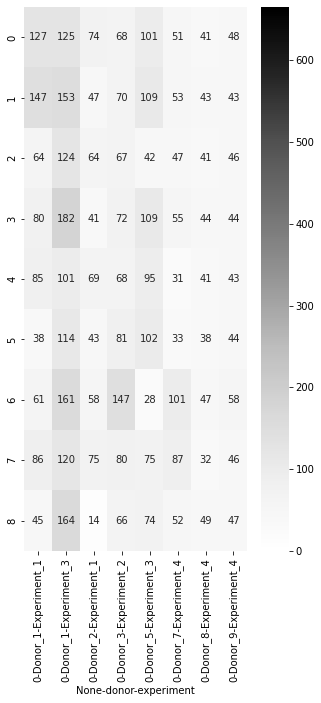

In [7]:
indx = metadata["label"].isin(set_of_interesting_classes)
indx = indx & metadata["condition"].isin(["-SEA","+SEA"])

heatmap_plot =pd.pivot(metadata.loc[indx,["donor", "label", "experiment" ]].groupby(["donor", "label", "experiment"]).size().reset_index(), index = "label",columns=["donor", "experiment"]).loc[set_of_interesting_classes,:].reset_index(drop = True)
fig, ax = plt.subplots(figsize = (5,10))
sns.heatmap(heatmap_plot, cmap = "Greys", annot=True, fmt="d", ax = ax, vmin = 0, vmax = heatmap_plot.sum(1).max())
temp_data = pd.pivot(metadata.loc[indx,["donor", "label", "experiment" ]].groupby(["donor", "label", "experiment"]).size().reset_index(), index = "label",columns=["donor", "experiment"]).loc[set_of_interesting_classes,:].sum(axis = 1)

fig.subplots_adjust(hspace=0, wspace= 0) 
plt.savefig('Supplementary Figure - heatmap of labeled images.svg', bbox_inches="tight")

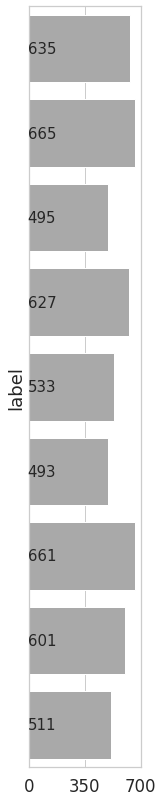

In [8]:

sns.set(font_scale = 1.5)
sns.set_style("whitegrid")
figsize = (2,14)
fig, ax = plt.subplots(figsize=figsize)

ax = sns.barplot(y=temp_data.index , x=temp_data.values, palette=['darkgray'], orient = "h", ax = ax)

for bar in ax.patches:

    ax.annotate(int(bar.get_width()) , 
                   (80, 
                    bar.get_y() + bar.get_height() / 2), ha='center', va='center',
                   size=15, xytext=(0, 0),
                   textcoords='offset points')

ax.set_yticks([])
ax.set_xlabel("")
ax.set_xticks([0,350,700])
plt.savefig('Supplementary Figure - count of labeled images.svg', bbox_inches="tight")